In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
PLTR_1D = pd.read_csv('output/1d/PLTR.csv')
AAPL_1D = pd.read_csv('output/1d/AAPL.csv')
PLTR_5M = pd.read_csv('output/5m/PLTR.csv')

In [75]:
PLTR_1D.describe(include='all')

,Datetime,Open,High,Low,Close,Volume,rsi,macd,obv,so,action,change_pct,change_shares,profits,shares,curr_capital
count,220,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,2.200000e+02,220.000000,220,220.000000,220.000000,220.000000,220.000000,220.000000
unique,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,2024-11-21 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buy,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.011464,29.683536,28.434868,29.140864,5.899932e+07,59.199711,0.105707,5.517446e+08,61.265246,NaN,0.202398,2.277273,5427.147354,475.904545,1152.781235
std,NaN,10.360414,10.647385,10.104430,10.497714,5.079949e+07,12.769684,0.376395,6.621212e+08,28.141647,NaN,3.432965,14.849640,5242.738316,132.120690,2584.290050
min,NaN,16.209999,16.410000,16.030001,16.090000,1.843380e+07,29.991971,-0.556016,-4.007382e+08,6.433901,NaN,-0.199922,-105.000000,0.000000,0.000000,92.720007
25%,NaN,22.435000,22.967500,22.077500,22.692501,3.406680e+07,47.769463,-0.129132,1.441780e+08,32.924630,NaN,0.000000,0.000000,1990.407801,511.000000,92.720007
50%,NaN,25.095000,25.547500,24.500000,25.200000,4.410390e+07,60.071018,0.059290,3.275979e+08,70.860160,NaN,0.000000,0.000000,3280.859891,525.000000,92.720007
75%,NaN,32.512500,32.843750,31.880000,32.510000,6.339788e+07,69.499225,0.243986,5.823974e+08,87.260398,NaN,0.000000,0.000000,7160.470127,525.000000,394.539999


In [77]:
PLTR_1D.loc[PLTR_1D['change_pct'].idxmax()]

Datetime         2024-10-29 00:00:00-04:00
Open                             44.900002
High                                 45.07
Low                              44.040001
Close                                44.93
Volume                            26154700
rsi                              74.137942
macd                               -0.0285
obv                           1680584000.0
so                               96.194024
action                                sell
change_pct                       50.880605
change_shares                       -105.0
profits                       13680.970167
shares                               420.0
curr_capital                   4810.370039
Name: 202, dtype: object

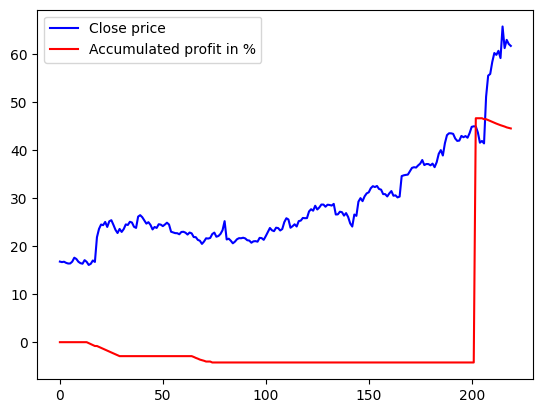

In [78]:
profits = np.cumsum(PLTR_1D['change_pct'])
plt.plot(PLTR_1D['Close'], color='blue', label='Close price')
plt.plot(profits, color='red', label='Accumulated profit in %')
plt.legend()
plt.show()

In [70]:
def plot_buy_sell(data, title: str):
    plt.plot(data['Close'], color='blue', label='Close price')
    sell = data.loc[data['action'] == 'sell']
    buy = data.loc[data['action'] == 'buy']
    plt.title(title)
    plt.plot(sell.index, sell['Close'], 'ro', label='Sell')
    plt.plot(buy.index, buy['Close'], 'go', label='Buy')
    plt.legend()
    plt.show()


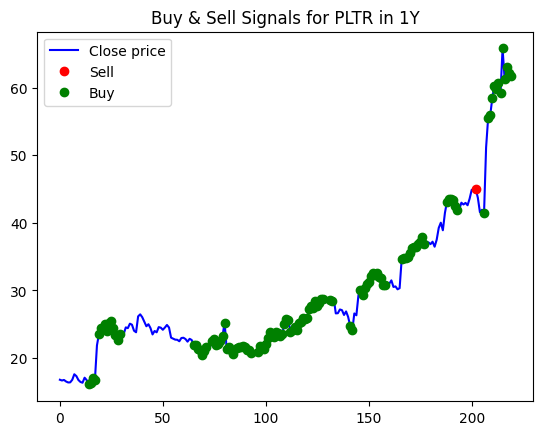

In [79]:
plot_buy_sell(PLTR_1D, 'Buy & Sell Signals for PLTR in 1Y')

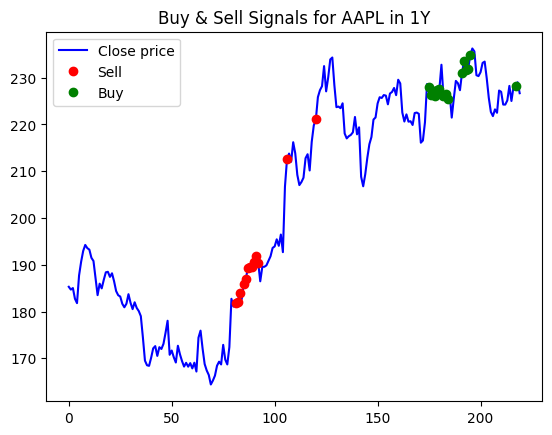

In [80]:
plot_buy_sell(AAPL_1D, 'Buy & Sell Signals for AAPL in 1Y')

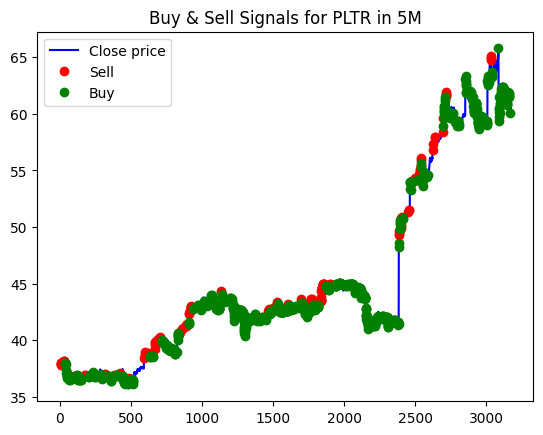

In [81]:
plot_buy_sell(PLTR_5M, 'Buy & Sell Signals for PLTR in 5M')